In [ ]:

Consider only Indian restaurants in this analysis -
1.	The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.
    1.	Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
    2.	Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
    3.	Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.
    4.	Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.



        
2.	User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
1.	Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
 1.	Number of Votes given Restaurant
 2.	Restaurant serving more number of cuisines.
 3.	Average Cost of Restaurant
 4.	Restaurant serving some specific cuisines.

2.	Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
 1.	Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .


                                                                 

                                                                 
3.	Visualization
 1.	Plot the bar graph top 15 restaurants have a maximum number of outlets.
 2.	Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).
 3.	Plot the bar graph top 10 restaurants in the data with the highest number of votes.
 4.	Plot the pie graph of top 10 cuisines present in restaurants in the USA.
 5.	Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.
Your project will be evaluated on following parameters -
•  Plots and graphs (Max Score 20)
•  Justification (Max Score 20)
•  Answer correctness (Max Score 20)



In [104]:
import matplotlib.pyplot as plt
import pandas as pd

a = pd.read_csv('zomato.csv' , encoding = 'utf-8')
b = a.copy()
b.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


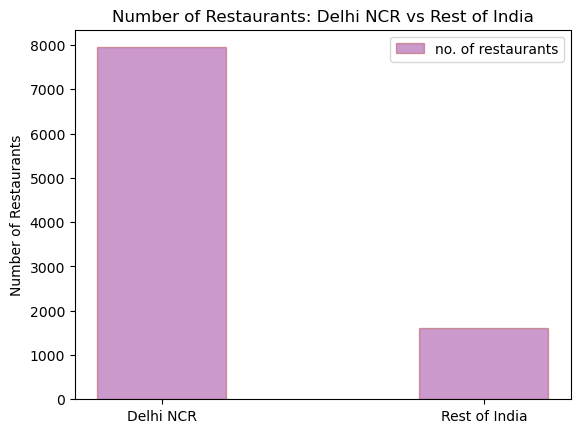

In [113]:
import matplotlib.pyplot as plt
import pandas as pd

a = pd.read_csv('zomato.csv' , encoding = 'utf-8')
b = a.copy()


b['Location'] = b['City'].apply(lambda x : 'Delhi NCR' if x in ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'] else 'Rest of India')

restaurant_count = b['Location'].value_counts().sort_index()

# Plotting the bar chart
plt.bar(restaurant_count.index , restaurant_count.values , width = 0.4, color = 'purple' , edgecolor = 'brown' , alpha = 0.4 , label = 'no. of restaurants')
plt.title('Number of Restaurants: Delhi NCR vs Rest of India')
plt.ylabel('Number of Restaurants')
plt.legend()

plt.show()

In [114]:
import pandas as pd

a = pd.read_csv('zomato.csv', encoding='utf-8')
b = a.copy()

# Create Location column
b['Location'] = b['City'].apply(lambda x: 'Delhi NCR' if x in ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'] else 'Rest of India')


b = b.dropna(subset=['Cuisines'])
b['Cuisines'] = b['Cuisines'].str.strip()



# Split and explode cuisines by location
delhi_cuisines = b[b['Location'] == 'Delhi NCR']['Cuisines'].str.split(',').explode().str.strip()
rest_cuisines = b[b['Location'] == 'Rest of India']['Cuisines'].str.split(',').explode().str.strip()

# Find cuisines in Rest of India but not in Delhi NCR

# Sets ko use karke subtraction fast ho jaata hai,agr list ya series m kaam kr rhe ho 

missing_cuisines = set(rest_cuisines) - set(delhi_cuisines)

print("Cuisines present in Rest of India but not in Delhi NCR:")
for cuisine in sorted(missing_cuisines):
    print(cuisine)


Cuisines present in Rest of India but not in Delhi NCR:
Argentine
Asian Fusion
Australian
BBQ
Bar Food
Brazilian
Breakfast
Bubble Tea
Bí_rek
Cajun
Canadian
Cantonese
Caribbean
Coffee and Tea
Contemporary
Cuban
Curry
Dim Sum
Diner
Durban
Dí_ner
Filipino
Fish and Chips
Fusion
German
Gourmet Fast Food
Grill
Hawaiian
International
Irish
Izgara
Kebab
Kiwi
Latin American
Malay
Malwani
Mineira
Modern Australian
New American
Patisserie
Peranakan
Peruvian
Pub Food
Ramen
Restaurant Cafe
Scottish
Singaporean
Soul Food
South African
Southern
Southwestern
Sunda
Taiwanese
Tapas
Teriyaki
Turkish Pizza
Vegetarian
Western
World Cuisine


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

a = pd.read_csv('zomato.csv' , encoding = 'utf-8')
b = a.copy()


b['Location'] = b['City'].apply(lambda x : 'Delhi NCR' if x in ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'] else 'Rest of India')

b= b.dropna(subset = ['Cuisines'])
b['Cuisines'] = b['Cuisines'].str.strip()



delhi_cuisines = b[b['Location'] == 'Delhi NCR']['Cuisines'].str.split(',').explode().str.strip()
rest_cuisines = b[b['Location'] == 'Rest of India']['Cuisines'].str.split(',').explode().str.strip()

top_10_delhi_ncr = delhi_cuisines.value_counts().head(10)
top_10_rest_of_india = rest_cuisines.value_counts().head(10)

print("Top 10 Cuisines in Delhi NCR:")
print(top_10_delhi_ncr)

print("\nTop 10 Cuisines in Rest of India:")
print(top_10_rest_of_india)


Top 10 Cuisines in Delhi NCR:
Cuisines
North Indian    3597
Chinese         2448
Fast Food       1866
Mughlai          933
Bakery           697
South Indian     569
Continental      547
Desserts         542
Street Food      538
Italian          535
Name: count, dtype: int64

Top 10 Cuisines in Rest of India:
Cuisines
North Indian    363
Chinese         287
Italian         229
Cafe            212
American        197
Continental     189
Seafood         121
Fast Food       120
Desserts        111
Mexican         101
Name: count, dtype: int64


In [ ]:
Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. 
Plot the suitable graph to explain your inference.

<Figure size 1200x600 with 0 Axes>

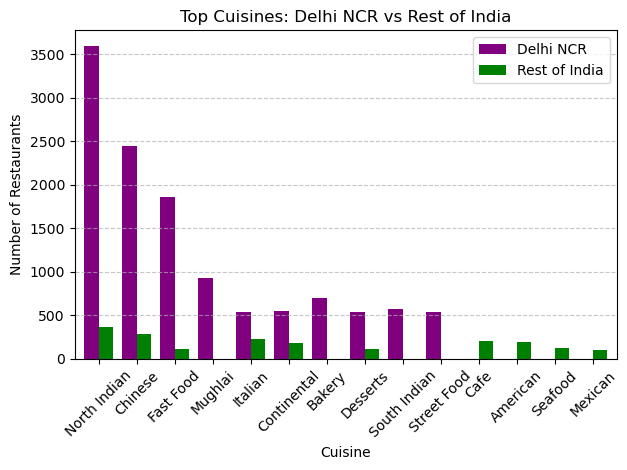

              Delhi NCR  Rest of India
Cuisines                              
North Indian       3597            363
Chinese            2448            287
Fast Food          1866            120
Mughlai             933              0
Italian             535            229
Continental         547            189
Bakery              697              0
Desserts            542            111
South Indian        569              0
Street Food         538              0
Cafe                  0            212
American              0            197
Seafood               0            121
Mexican               0            101


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

a = pd.read_csv('zomato.csv' , encoding = 'utf-8')
b = a.copy()


b['Location'] = b['City'].apply(lambda x : 'Delhi NCR' if x in ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'] else 'Rest of India')

b= b.dropna(subset = ['Cuisines'])
b['Cuisines'] = b['Cuisines'].str.strip()


delhi_cuisines = b[b['Location'] == 'Delhi NCR']['Cuisines'].str.split(',').explode().str.strip()
rest_cuisines = b[b['Location'] == 'Rest of India']['Cuisines'].str.split(',').explode().str.strip()

top_10_delhi_ncr = delhi_cuisines.value_counts().head(10)
top_10_rest_of_india = rest_cuisines.value_counts().head(10)




# Combine into a single DataFrame
combined_cuisines = pd.concat([top_10_delhi_ncr, top_10_rest_of_india], axis=1)  # axis = 1 for indexing and for horizontal alignment

combined_cuisines.columns = ['Delhi NCR', 'Rest of India']

combined_cuisines = combined_cuisines.fillna(0).astype(int) # fill nan as 0 and all decimal values as int

combined_cuisines['Total'] = combined_cuisines['Delhi NCR'] + combined_cuisines['Rest of India']

combined_cuisines = combined_cuisines.sort_values('Total', ascending=False).drop(columns='Total')

# Plotting
plt.figure(figsize=(12, 6))

combined_cuisines.plot(kind='bar', width=0.75, color=['purple', 'green'])


plt.title('Top Cuisines: Delhi NCR vs Rest of India')

plt.ylabel('Number of Restaurants')
plt.xlabel('Cuisine')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

# Print data for reference
print(combined_cuisines)

In [ ]:
Delhi NCR Dominates:
North Indian and Chinese cuisines top the chart in both regions, but are massively more prevalent in Delhi NCR.

Fast Food, Mughlai, Street Food, South Indian, and Bakery are heavily favored in Delhi NCR but are almost absent in Rest of India.

This reflects Delhi NCR’s strong street food culture and a preference for quick and local bites.




Rest of India Specialties:
Cafe, American, Seafood, and Mexican cuisines appear only in the Rest of India.

These cuisines are more likely to be found in coastal cities (Seafood) or tourist hubs and cosmopolitan centers (Cafe, Mexican, American).

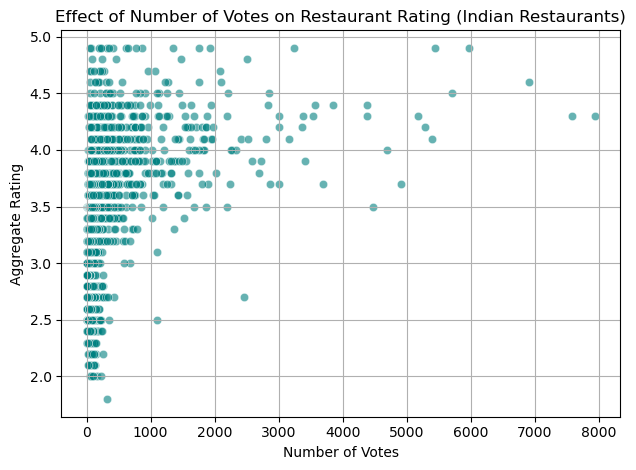

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

a = pd.read_csv('zomato.csv' , encoding = 'utf-8')
b = a.copy()



# Filter Indian restaurants only
b = b[b['Cuisines'].str.contains('Indian', case=False, na=False)]

# Remove missing or invalid votes and ratings

b = b.dropna(subset=['Votes', 'Aggregate rating'])

b['Votes'] = pd.to_numeric(b['Votes'], errors='coerce')

b['Aggregate rating'] = pd.to_numeric(b['Aggregate rating'], errors='coerce')

b= b[(b['Votes'] > 0) & (b['Aggregate rating'] > 0)]



sns.scatterplot(data=b, x='Votes', y='Aggregate rating', alpha=0.6, color='teal')
plt.title('Effect of Number of Votes on Restaurant Rating (Indian Restaurants)')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Restaurant serving more number of cuisines.

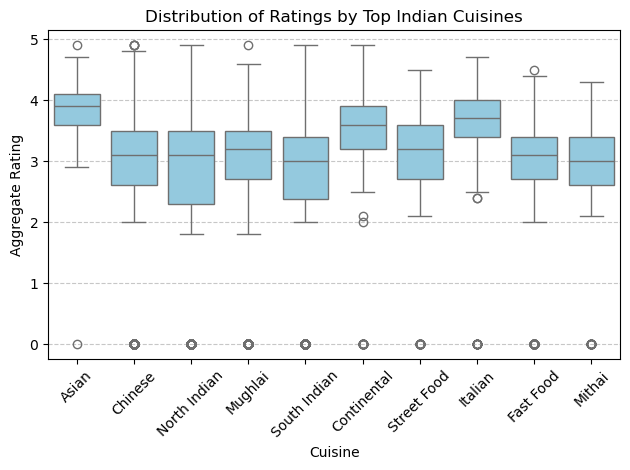

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

a = pd.read_csv('zomato.csv' , encoding = 'utf-8')
b = a.copy()



# Filter Indian restaurants only
b = b[b['Cuisines'].str.contains('Indian', case=False, na=False)]

# Cleaning
b = b.dropna(subset=['Aggregate rating'])
b['Aggregate rating'] = pd.to_numeric(b['Aggregate rating'], errors='coerce')


# cuisine count
# assign() with explode() makes sure index stays aligned properly with the original DataFrame

b = b.assign(Cuisines=b['Cuisines'].str.split(',')).explode('Cuisines')
b['Cuisines'] = b['Cuisines'].str.strip()

top_cuisines = b['Cuisines'].value_counts().head(10).index
filtered = b[b['Cuisines'].isin(top_cuisines)]


sns.boxplot(data=filtered, x='Cuisines', y='Aggregate rating',color='skyblue')

plt.title('Distribution of Ratings by Top Indian Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

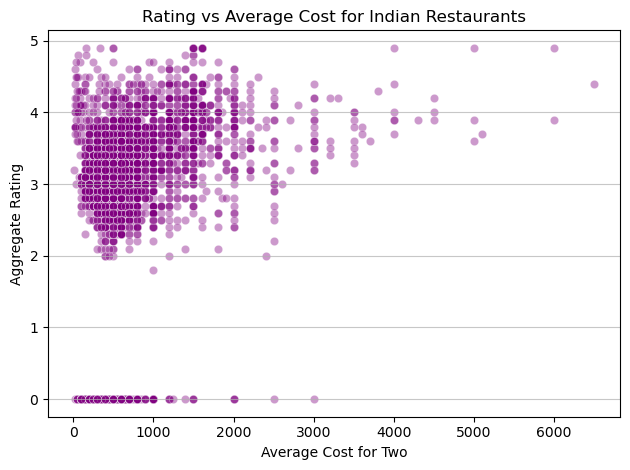

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

a = pd.read_csv('zomato.csv' , encoding = 'utf-8')
b = a.copy()

# Filter only Indian restaurants 
b = b[b['Cuisines'].str.contains('Indian' , case = False , na = False)]

b['Average Cost for two'] = b['Average Cost for two'].astype(str).str.replace(',','')
b['Average Cost for two'] = pd.to_numeric( b['Average Cost for two'], errors = 'coerce')
 
b = b.dropna(subset = ['Average Cost for two' , 'Aggregate rating'])
b = b[(b['Average Cost for two'] > 0 )]

sns.scatterplot(data = b , x = 'Average Cost for two' , y = 'Aggregate rating' , color = 'purple' , alpha = 0.4)
plt.title('Rating vs Average Cost for Indian Restaurants')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.grid(True , axis = 'y' , linestyle = '-' , alpha = 0.7)
plt.tight_layout()

plt.show()

In [ ]:
	Restaurant serving some specific cuisines. vs rating

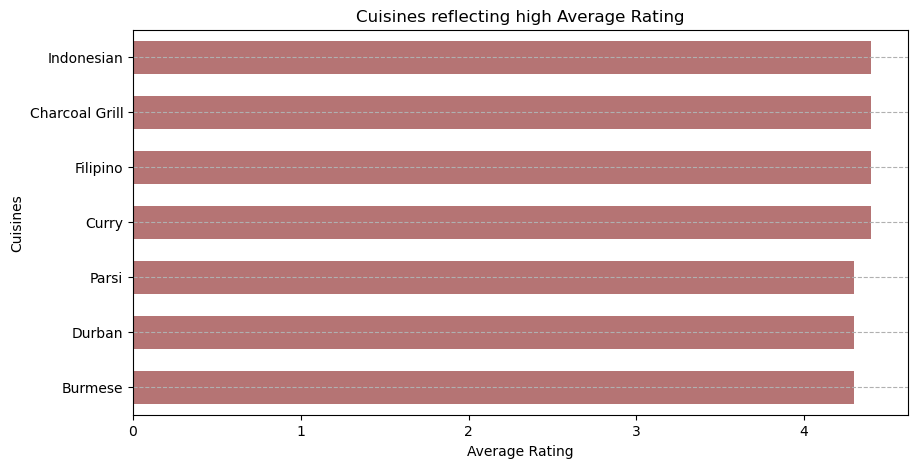

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

a = pd.read_csv('zomato.csv', encoding='utf-8')
b = a.copy()


# Filter only Indian restaurants 
b = b[b['Cuisines'].str.contains('Indian', case=False, na=False)]

# Split cuisines into separate rows
b = b.assign(Cuisines=b['Cuisines'].str.split(',')).explode('Cuisines')
b['Cuisines'] = b['Cuisines'].str.strip()
b = b.dropna(subset = ['Aggregate rating'])

cuisine_avg = b.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False).head(7)
colors = ['blue', 'green', 'orange', 'purple', 'pink', 'brown', 'yellow']

plt.figure(figsize=(10, 5))

sns.barplot(x = cuisine_avg.values  ,y = cuisine_avg.index , color = 'brown', alpha = 0.7 , width = 0.6)
plt.title('Cuisines reflecting high Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisines')
plt.grid(True , axis = 'y' , linestyle= '--' , alpha = 1.0)
plt.show()



In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

a = pd.read_csv('zomato.csv', encoding='utf-8')
b = a.copy()


# Filter only Indian restaurants 
b = b[b['Cuisines'].str.contains('Indian', case=False, na=False)]


b['Location'] = b['City'].apply(lambda x : 'Delhi NCR' if x in ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad'] else 'Rest of India')


# Remove missing or invalid votes and ratings
b = b.dropna(subset=['Votes', 'Aggregate rating'])
b['Votes'] = pd.to_numeric(b['Votes'], errors='coerce')
b['Aggregate rating'] = pd.to_numeric(b['Aggregate rating'], errors='coerce')

def calc_weighted_rating(x):
    votes = x['Votes']
    ratings = x['Aggregate rating']
    if votes.sum() == 0:
        return None
    return (votes * ratings).sum() / votes.sum()

# Group by locality and apply the function
weighted_rating = b.groupby('Locality').apply(calc_weighted_rating)

# Get top 10 localities
top_locality_weighted_rating = weighted_rating.sort_values(ascending=False).dropna().head(10)

# Show result
print(top_locality_weighted_rating)

Locality
Deira City Centre Area                         4.9
Kirlampudi Layout                              4.9
Banjara Hills                                  4.9
Ulubari                                        4.9
DIFC                                           4.9
Sitabuldi                                      4.9
Venetian Village, Al Maqtaa                    4.9
Sofitel Philippine Plaza Manila, Pasay City    4.9
Friends Colony                                 4.9
Nassima Royal Hotel, Trade Centre Area         4.9
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_16960\158477170.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_rating = b.groupby('Locality').apply(calc_weighted_rating)


In [ ]:
1.	Plot the bar graph top 15 restaurants have a maximum number of outlets.

Green Chick Chop 48
Barbeque Nation 26
Pind Balluchi 20
Sagar Ratna 19
Wah Ji Wah 18
Twenty Four Seven 17
Haldiram's 16
Shree Rathnam 15
Bikanervala 14
Moti Mahal Delux 14
Karim's 13
Apni Rasoi 12
Madras Cafe 11
Kebab Xpress 8
Punjabi Tadka 8


C:\Users\User\AppData\Local\Temp\ipykernel_16960\2002641125.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=restaurant_count.values , y = restaurant_count.index , palette = 'pastel' )


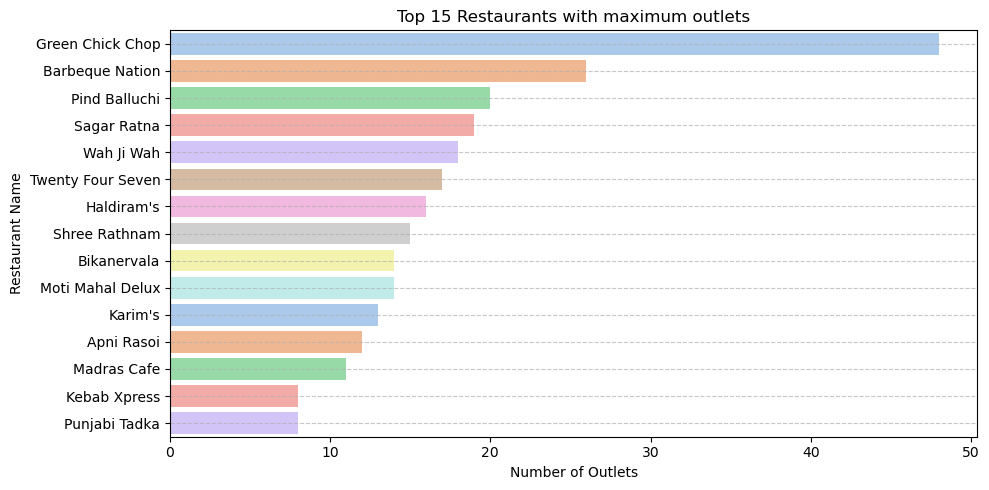

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

a = pd.read_csv('zomato.csv', encoding='utf-8')
b = a.copy()


# Filter only Indian restaurants 
b = b[b['Cuisines'].str.contains('Indian', case=False, na=False)]


b = b.dropna(subset=['Restaurant Name'])

restaurant_count = b['Restaurant Name'].value_counts().sort_values(ascending = False).head(15)
for restaurant_name , count in restaurant_count.items():
    print(restaurant_name , count)

plt.figure(figsize=(10,5))
sns.barplot(x=restaurant_count.values , y = restaurant_count.index , palette = 'pastel' )
plt.title('Top 15 Restaurants with maximum outlets')
plt.xlabel('Number of Outlets')
plt.ylabel('Restaurant Name')
plt.grid(True , axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.tight_layout()
plt.show()

In [ ]:
Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

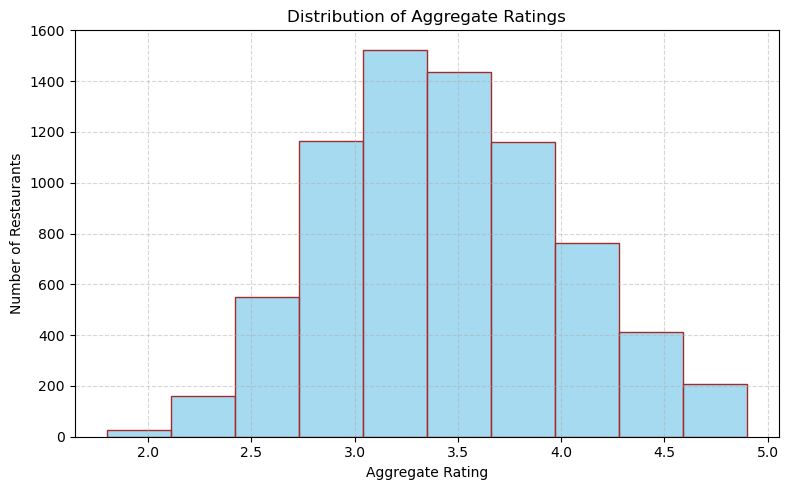

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
a = pd.read_csv('zomato.csv', encoding='utf-8')
b = a.copy()

# Clean 'Aggregate rating' column
b['Aggregate rating'] = pd.to_numeric(b['Aggregate rating'], errors='coerce')
b = b[b['Aggregate rating'] > 0]  

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(b['Aggregate rating'], bins=10, kde=False, color='skyblue', edgecolor='brown')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
Plot the bar graph top 10 restaurants in the data with the highest number of votes.

Barbeque Nation 28142
AB's - Absolute Barbecues 13400
Farzi Cafe 10098
Hauz Khas Social 7931
Peter Cat 7574
Saravana Bhavan 7238
Pirates of Grill 7091
Karim's 6878
Big Brewsky 5705
Pind Balluchi 5582
Punjab Grill 5424
The Black Pearl 5385
BarBQ 5288
Warehouse Cafe 4914
Out Of The Box 4900


C:\Users\User\AppData\Local\Temp\ipykernel_16960\3321812522.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=restaurant_votes.values , y = restaurant_votes.index , palette = 'pastel' )


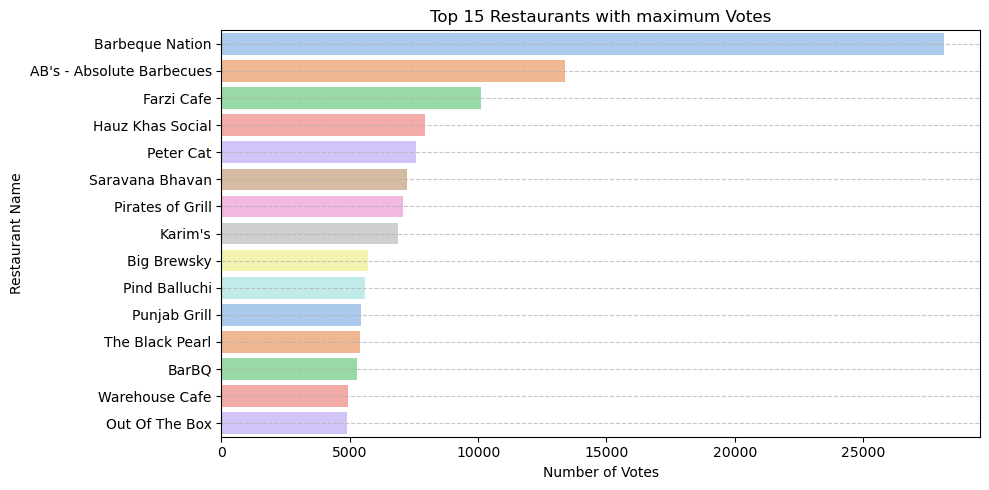

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
a = pd.read_csv('zomato.csv', encoding='utf-8')
b = a.copy()

# Filter only Indian restaurants 
b = b[b['Cuisines'].str.contains('Indian', case=False, na=False)]


b = b.dropna(subset=['Restaurant Name'])

b['Votes'] = pd.to_numeric(b['Votes'], errors='coerce')
b = b[b['Votes'] > 0]  


restaurant_votes = b.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False).head(15)

for restaurant_name , votes in restaurant_votes.items():
    print(restaurant_name , votes)


plt.figure(figsize=(10,5))
sns.barplot(x=restaurant_votes.values , y = restaurant_votes.index , palette = 'pastel' )
plt.title('Top 15 Restaurants with maximum Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Restaurant Name')
plt.grid(True , axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.tight_layout()
plt.show()

In [ ]:
Plot the pie graph of top 10 cuisines present in restaurants in the USA.

In [90]:
print(b['Country Code'].unique())


[162  30 216 184 214   1 215 166 189 191]


Mexican 25
American 16
BBQ 9
Chinese 9
Seafood 8
Italian, Pizza 8
American, Seafood, Steak 8
Italian 8
Japanese, Steak, Sushi 8
Japanese, Sushi 7


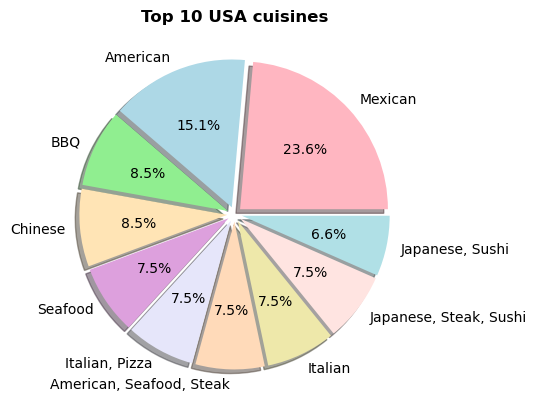

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
a = pd.read_csv('zomato.csv', encoding='utf-8')
b = a.copy()


# Country Code Mapping: 
country_map = {
    1: 'India',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    184: 'Singapore',
    189: 'South Africa',
    191: 'Sri Lanka',
    208: 'Turkey',
    214: 'UAE',
    215: 'United Kingdom',
    216: 'United States'
}
b['Country Name'] = b['Country Code'].map(country_map)


b = b[b['Country Name'] == 'United States']

b = b.dropna(subset=['Cuisines'])
b['Cuisines'] = b['Cuisines'].str.strip()



top_usa_cuisines = b['Cuisines'].value_counts().sort_values(ascending=False).head(10)

for cuisines , count in top_usa_cuisines.items():
    print(cuisines,count)

colors = ['lightpink', 'lightblue', 'lightgreen', 'moccasin', 'plum', 'lavender', 'peachpuff', 'palegoldenrod', 'mistyrose', 'powderblue']
explode = [0.05] * 10  # Slightly pull all slices out
plt.pie(top_usa_cuisines.values , labels = top_usa_cuisines.index , autopct = '%.1f%%' , colors = colors ,explode=explode,shadow= True)
plt.title('Top 10 USA cuisines', fontsize=12, weight='bold')
plt.show()


In [ ]:
Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

C:\Users\User\AppData\Local\Temp\ipykernel_16960\1420807241.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_rating = b.groupby('City').apply(lambda x: (x['Votes'] * x['Aggregate rating']).sum() / x['Votes'].sum())


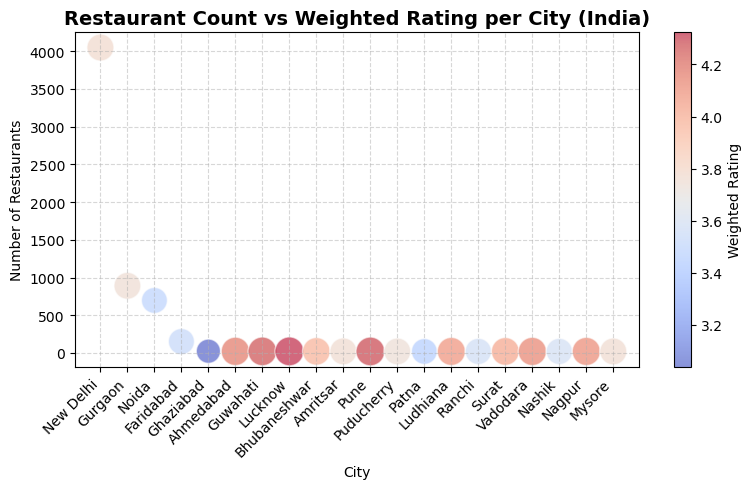

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
a = pd.read_csv('zomato.csv', encoding='utf-8')
b = a.copy()

# Filter only Indian restaurants
b = b[b['Country Code'] == 1]

# Clean data
b = b.dropna(subset=['City', 'Votes', 'Aggregate rating'])
b['Votes'] = pd.to_numeric(b['Votes'], errors='coerce')
b['Aggregate rating'] = pd.to_numeric(b['Aggregate rating'], errors='coerce')

# Remove invalid entries
b = b[(b['Votes'] > 0) & (b['Aggregate rating'] > 0)]

# Number of restaurants per city
city_restaurant_count = b['City'].value_counts()

# Weighted rating per city
weighted_rating = b.groupby('City').apply(lambda x: (x['Votes'] * x['Aggregate rating']).sum() / x['Votes'].sum())

# Combine both into one DataFrame
bubble_df = pd.DataFrame({
    'City': city_restaurant_count.index,
    'Restaurant Count': city_restaurant_count.values,
    'Weighted Rating': weighted_rating[city_restaurant_count.index]
}).dropna()

# Top 20 cities for visibility
bubble_df = bubble_df.head(20)

# Plotting
plt.figure(figsize=(8, 5))
scatter = plt.scatter(
    bubble_df['City'],
    bubble_df['Restaurant Count'],
    s=bubble_df['Weighted Rating'] * 100,  # Scale bubble size
    alpha=0.6,
    c=bubble_df['Weighted Rating'],
    cmap='coolwarm',
    edgecolors='w',
    linewidths=1
)
plt.xticks(rotation=45, ha='right')
plt.title('Restaurant Count vs Weighted Rating per City (India)', fontsize=14, weight='bold')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.colorbar(scatter, label='Weighted Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

